In [1]:
# import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import DivergingNorm
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
### Establish higher res cartopy data
coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m')
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')

states_50m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes', '50m')

In [3]:
### Calculate lat/long info for the map
boem_coords = np.loadtxt('data/ca20/coordinates_ca20.csv')
lat_vec = boem_coords[:,0]
long_vec = boem_coords[:,1]

LAT_MIN = lat_vec.min()
LAT_MAX = lat_vec.max()
LAT_MEAN = lat_vec.mean()
LONG_MIN = long_vec.min()
LONG_MAX = long_vec.max()
LONG_MEAN = long_vec.mean()
MAP_BOUNDS = [LONG_MIN, LONG_MAX, LAT_MIN, LAT_MAX]

In [4]:
### Process shapefiles for lease regions
## Load shapefiles
df = gpd.read_file('data/shapefiles/CA_Call_Areas_2018_09_26.shp')

## Convert projection to match what we use in Cartopy
crs = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
crs_proj4 = crs.proj4_init
df_proj = df.to_crs(crs_proj4)

## Merge (aka dissolve) geometries by lease area
df_proj_group = df_proj.dissolve(by='AREA_NM')

In [5]:
### Load data
## Winds
mynn_vs_wind = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-VS.csv")
mynn_s_wind = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-S.csv")
mynn_ws_wind = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-WS.csv")
mynn_wun_wind = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-WUN.csv")
mynn_un_wind = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-UN.csv")
mynn_vun_wind = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-VUN.csv")

ysu_vs_wind = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-VS.csv")
ysu_s_wind = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-S.csv")
ysu_ws_wind = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-WS.csv")
ysu_wun_wind = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-WUN.csv")
ysu_un_wind = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-UN.csv")
ysu_vun_wind = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-VUN.csv")


## Count of timesteps in that stability
n_timesteps = 105120
mynn_vs_counts = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-VS-counts.csv")
mynn_vs_counts = n_timesteps - mynn_vs_counts
mynn_s_counts = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-S-counts.csv")
mynn_s_counts = n_timesteps - mynn_s_counts
mynn_ws_counts = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-WS-counts.csv")
mynn_ws_counts = n_timesteps - mynn_ws_counts
mynn_wun_counts = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-WUN-counts.csv")
mynn_wun_counts = n_timesteps - mynn_wun_counts
mynn_un_counts = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-UN-counts.csv")
mynn_un_counts = n_timesteps - mynn_un_counts
mynn_vun_counts = np.loadtxt("data/pbl/WRF1-WPS1-bulk-ri-VUN-counts.csv")
mynn_vun_counts = n_timesteps - mynn_vun_counts

ysu_vs_counts = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-VS-counts.csv")
ysu_vs_counts = n_timesteps - ysu_vs_counts
ysu_s_counts = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-S-counts.csv")
ysu_s_counts = n_timesteps - ysu_s_counts
ysu_ws_counts = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-WS-counts.csv")
ysu_ws_counts = n_timesteps - ysu_ws_counts
ysu_wun_counts = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-WUN-counts.csv")
ysu_wun_counts = n_timesteps - ysu_wun_counts
ysu_un_counts = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-UN-counts.csv")
ysu_un_counts = n_timesteps - ysu_un_counts
ysu_vun_counts = np.loadtxt("data/pbl/WRF3-WPS1-bulk-ri-VUN-counts.csv")
ysu_vun_counts = n_timesteps - ysu_vun_counts

boem_coords = np.loadtxt('data/ca20/coordinates_ca20.csv')

mynn_vs_wind /= 100
mynn_s_wind /= 100
mynn_ws_wind /= 100
mynn_wun_wind /= 100
mynn_un_wind /= 100
mynn_vun_wind /= 100

ysu_vs_wind /= 100
ysu_s_wind /= 100
ysu_ws_wind /= 100
ysu_wun_wind /= 100
ysu_un_wind /= 100
ysu_vun_wind /= 100

In [6]:
### Turn counts into percents
mynn_vs_pct = (mynn_vs_counts / n_timesteps) * 100
mynn_s_pct = (mynn_s_counts / n_timesteps) * 100
mynn_ws_pct = (mynn_ws_counts / n_timesteps) * 100
mynn_wun_pct = (mynn_wun_counts / n_timesteps) * 100
mynn_un_pct = (mynn_un_counts / n_timesteps) * 100
mynn_vun_pct = (mynn_vun_counts / n_timesteps) * 100

ysu_vs_pct = (ysu_vs_counts / n_timesteps) * 100
ysu_s_pct = (ysu_s_counts / n_timesteps) * 100
ysu_ws_pct = (ysu_ws_counts / n_timesteps) * 100
ysu_wun_pct = (ysu_wun_counts / n_timesteps) * 100
ysu_un_pct = (ysu_un_counts / n_timesteps) * 100
ysu_vun_pct = (ysu_vun_counts / n_timesteps) * 100

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


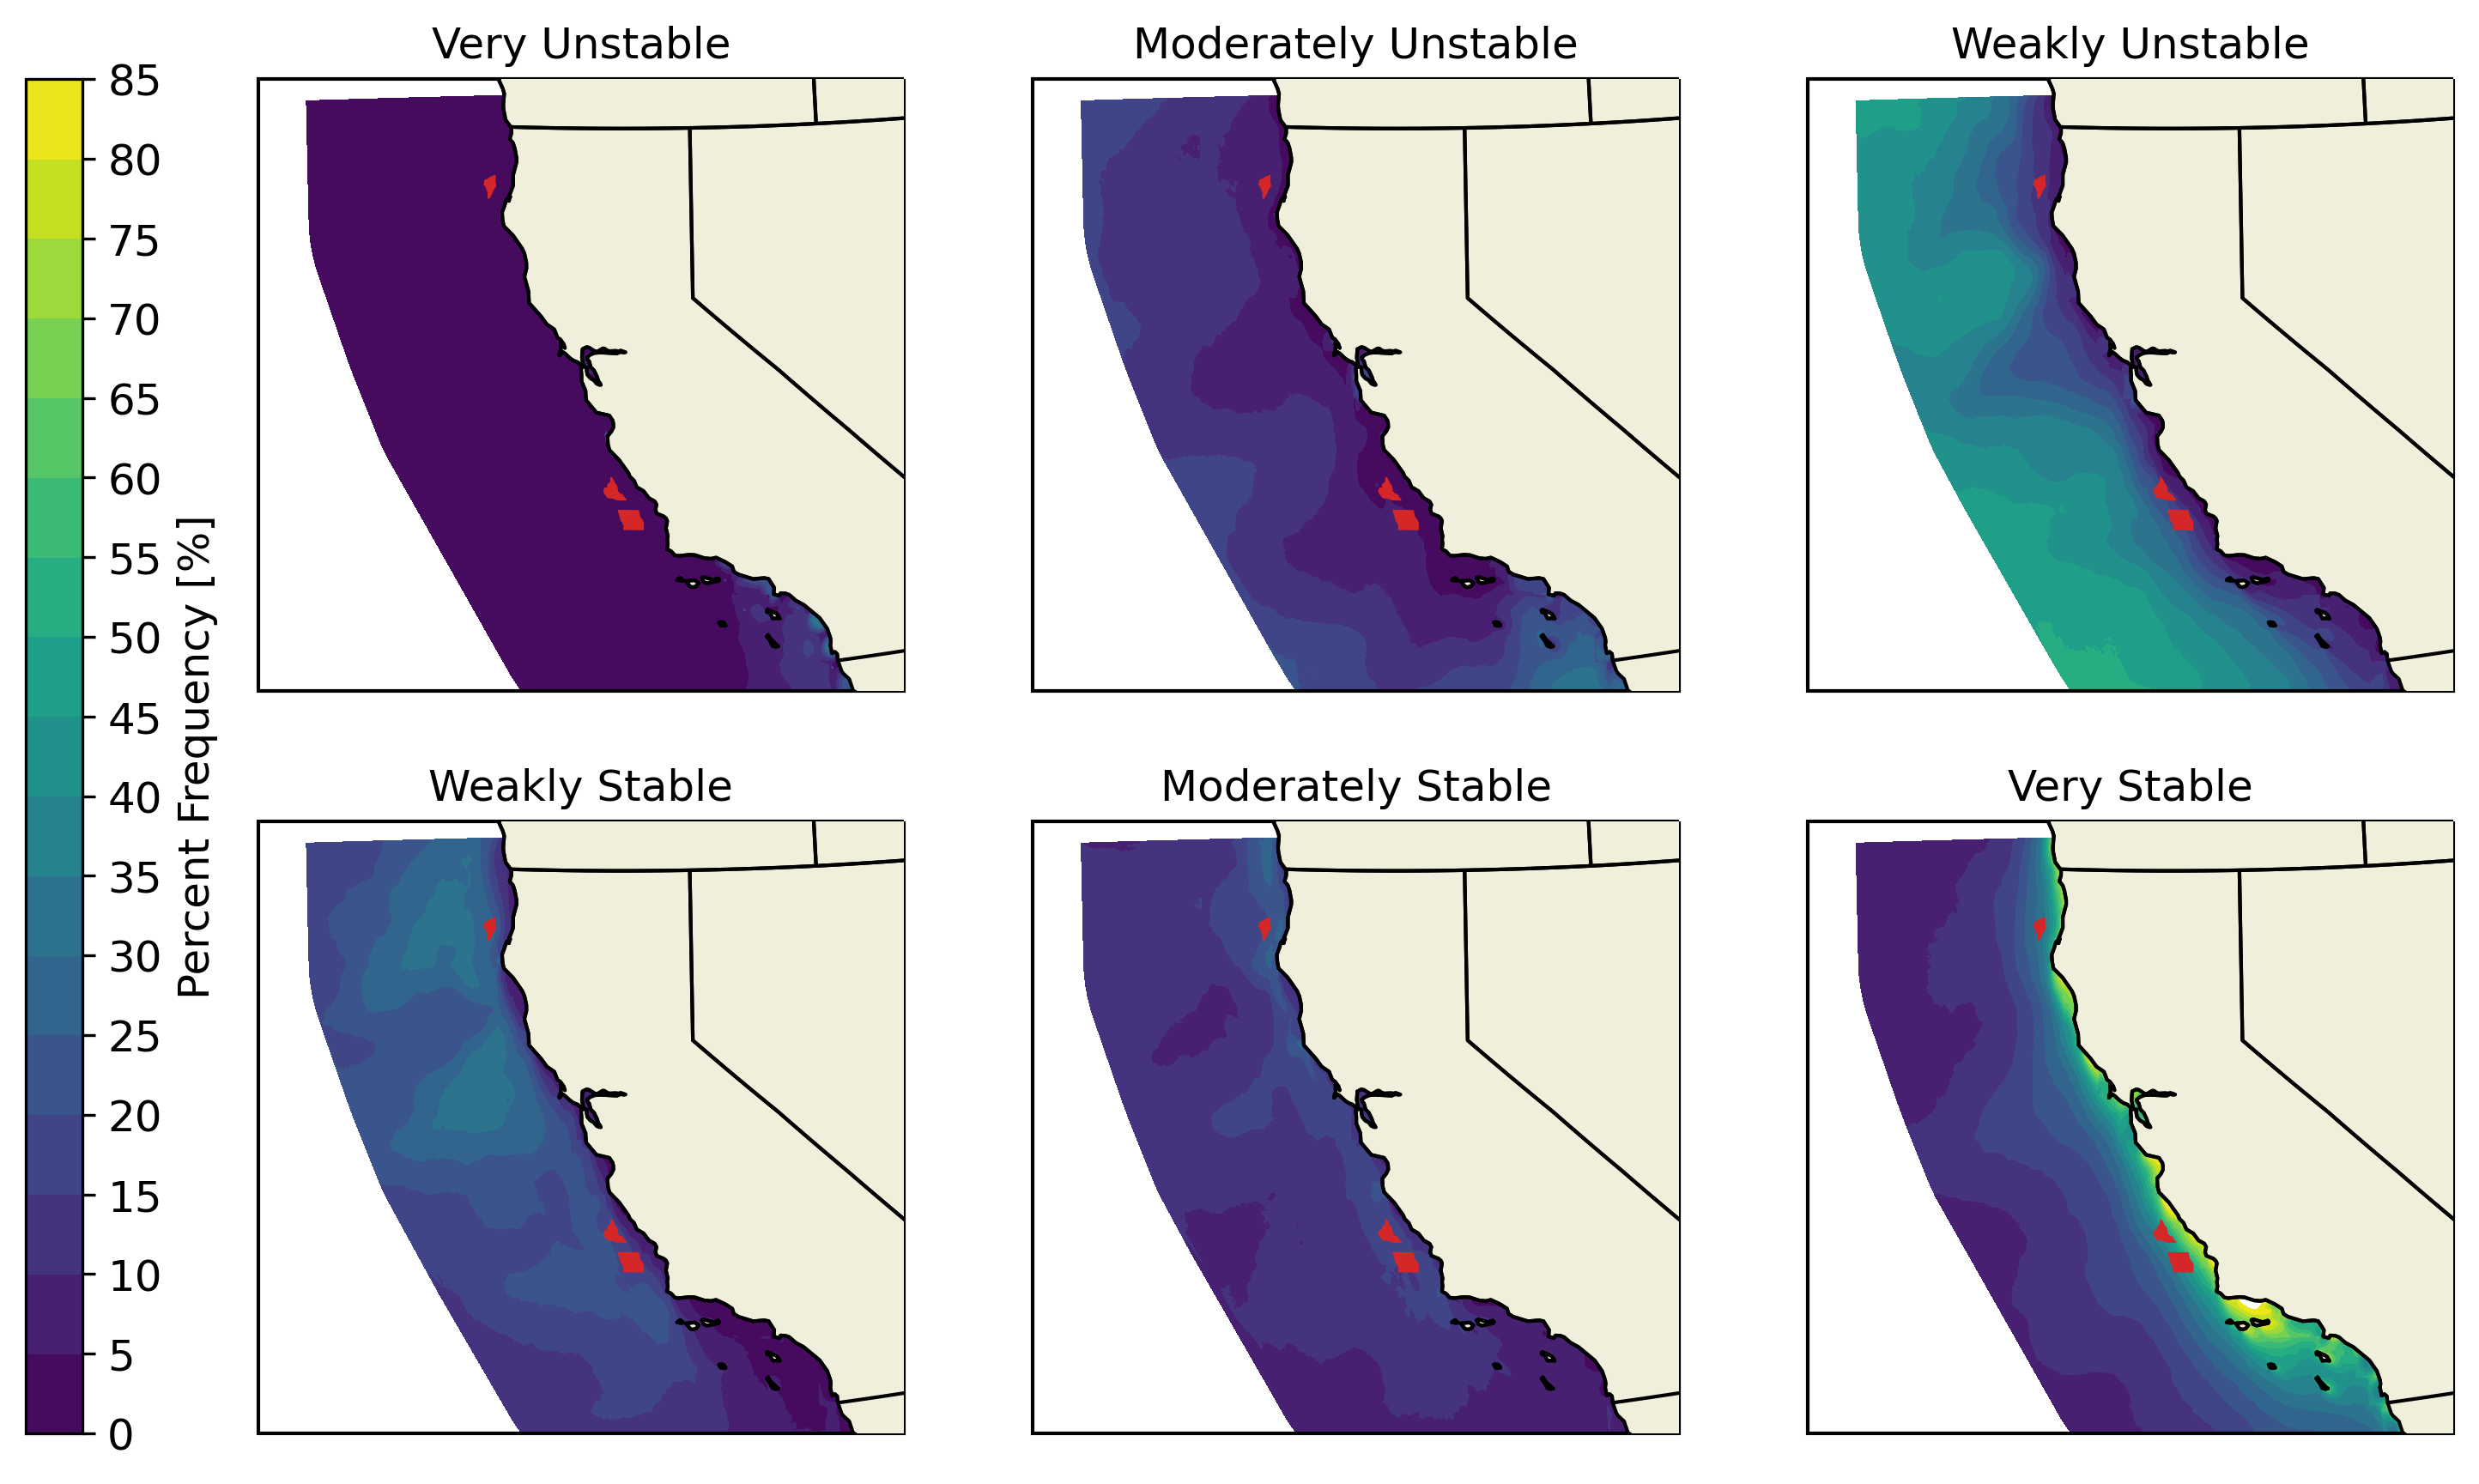

In [7]:
### Difference between CA20 and WTK
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(2, 3, figsize=(11, 7), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True, dpi=300)

ax[0,0].set_extent(MAP_BOUNDS)

# ticks_wind = np.linspace(1, 18, 18)
ticks_pct = np.linspace(0, 85, 18)

im3 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        mynn_vun_pct,
                        ticks_pct, transform=ccrs.Geodetic())
im3 = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        mynn_un_pct,
                        ticks_pct, transform=ccrs.Geodetic())
im3 = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        mynn_wun_pct,
                        ticks_pct, transform=ccrs.Geodetic())
im3 = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        mynn_ws_pct,
                        ticks_pct, transform=ccrs.Geodetic())
im3 = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        mynn_s_pct,
                        ticks_pct, transform=ccrs.Geodetic())
im3 = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        mynn_vs_pct,
                        ticks_pct, transform=ccrs.Geodetic())


cax1 = fig.add_axes([ax[-1,0].get_position().x1-0.31,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar1 = fig.colorbar(im3, cax=cax1, ticks=ticks_pct)
cbar1.set_label('Percent Frequency [%]', fontsize=12)
cbar1.ax.tick_params(labelsize=12) 


ax[0,0].set_title("Very Unstable")
ax[0,1].set_title("Moderately Unstable")
ax[0,2].set_title("Weakly Unstable")
ax[1,0].set_title("Weakly Stable")
ax[1,1].set_title("Moderately Stable")
ax[1,2].set_title("Very Stable")

# Add land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# Add states
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

## Add lease areas
ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='C3', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='C3', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='C3', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='C3', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='C3', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='C3', linewidth=0.3)

# plt.savefig("../figures/fig07.png", bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  app.launch_new_instance()
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor re

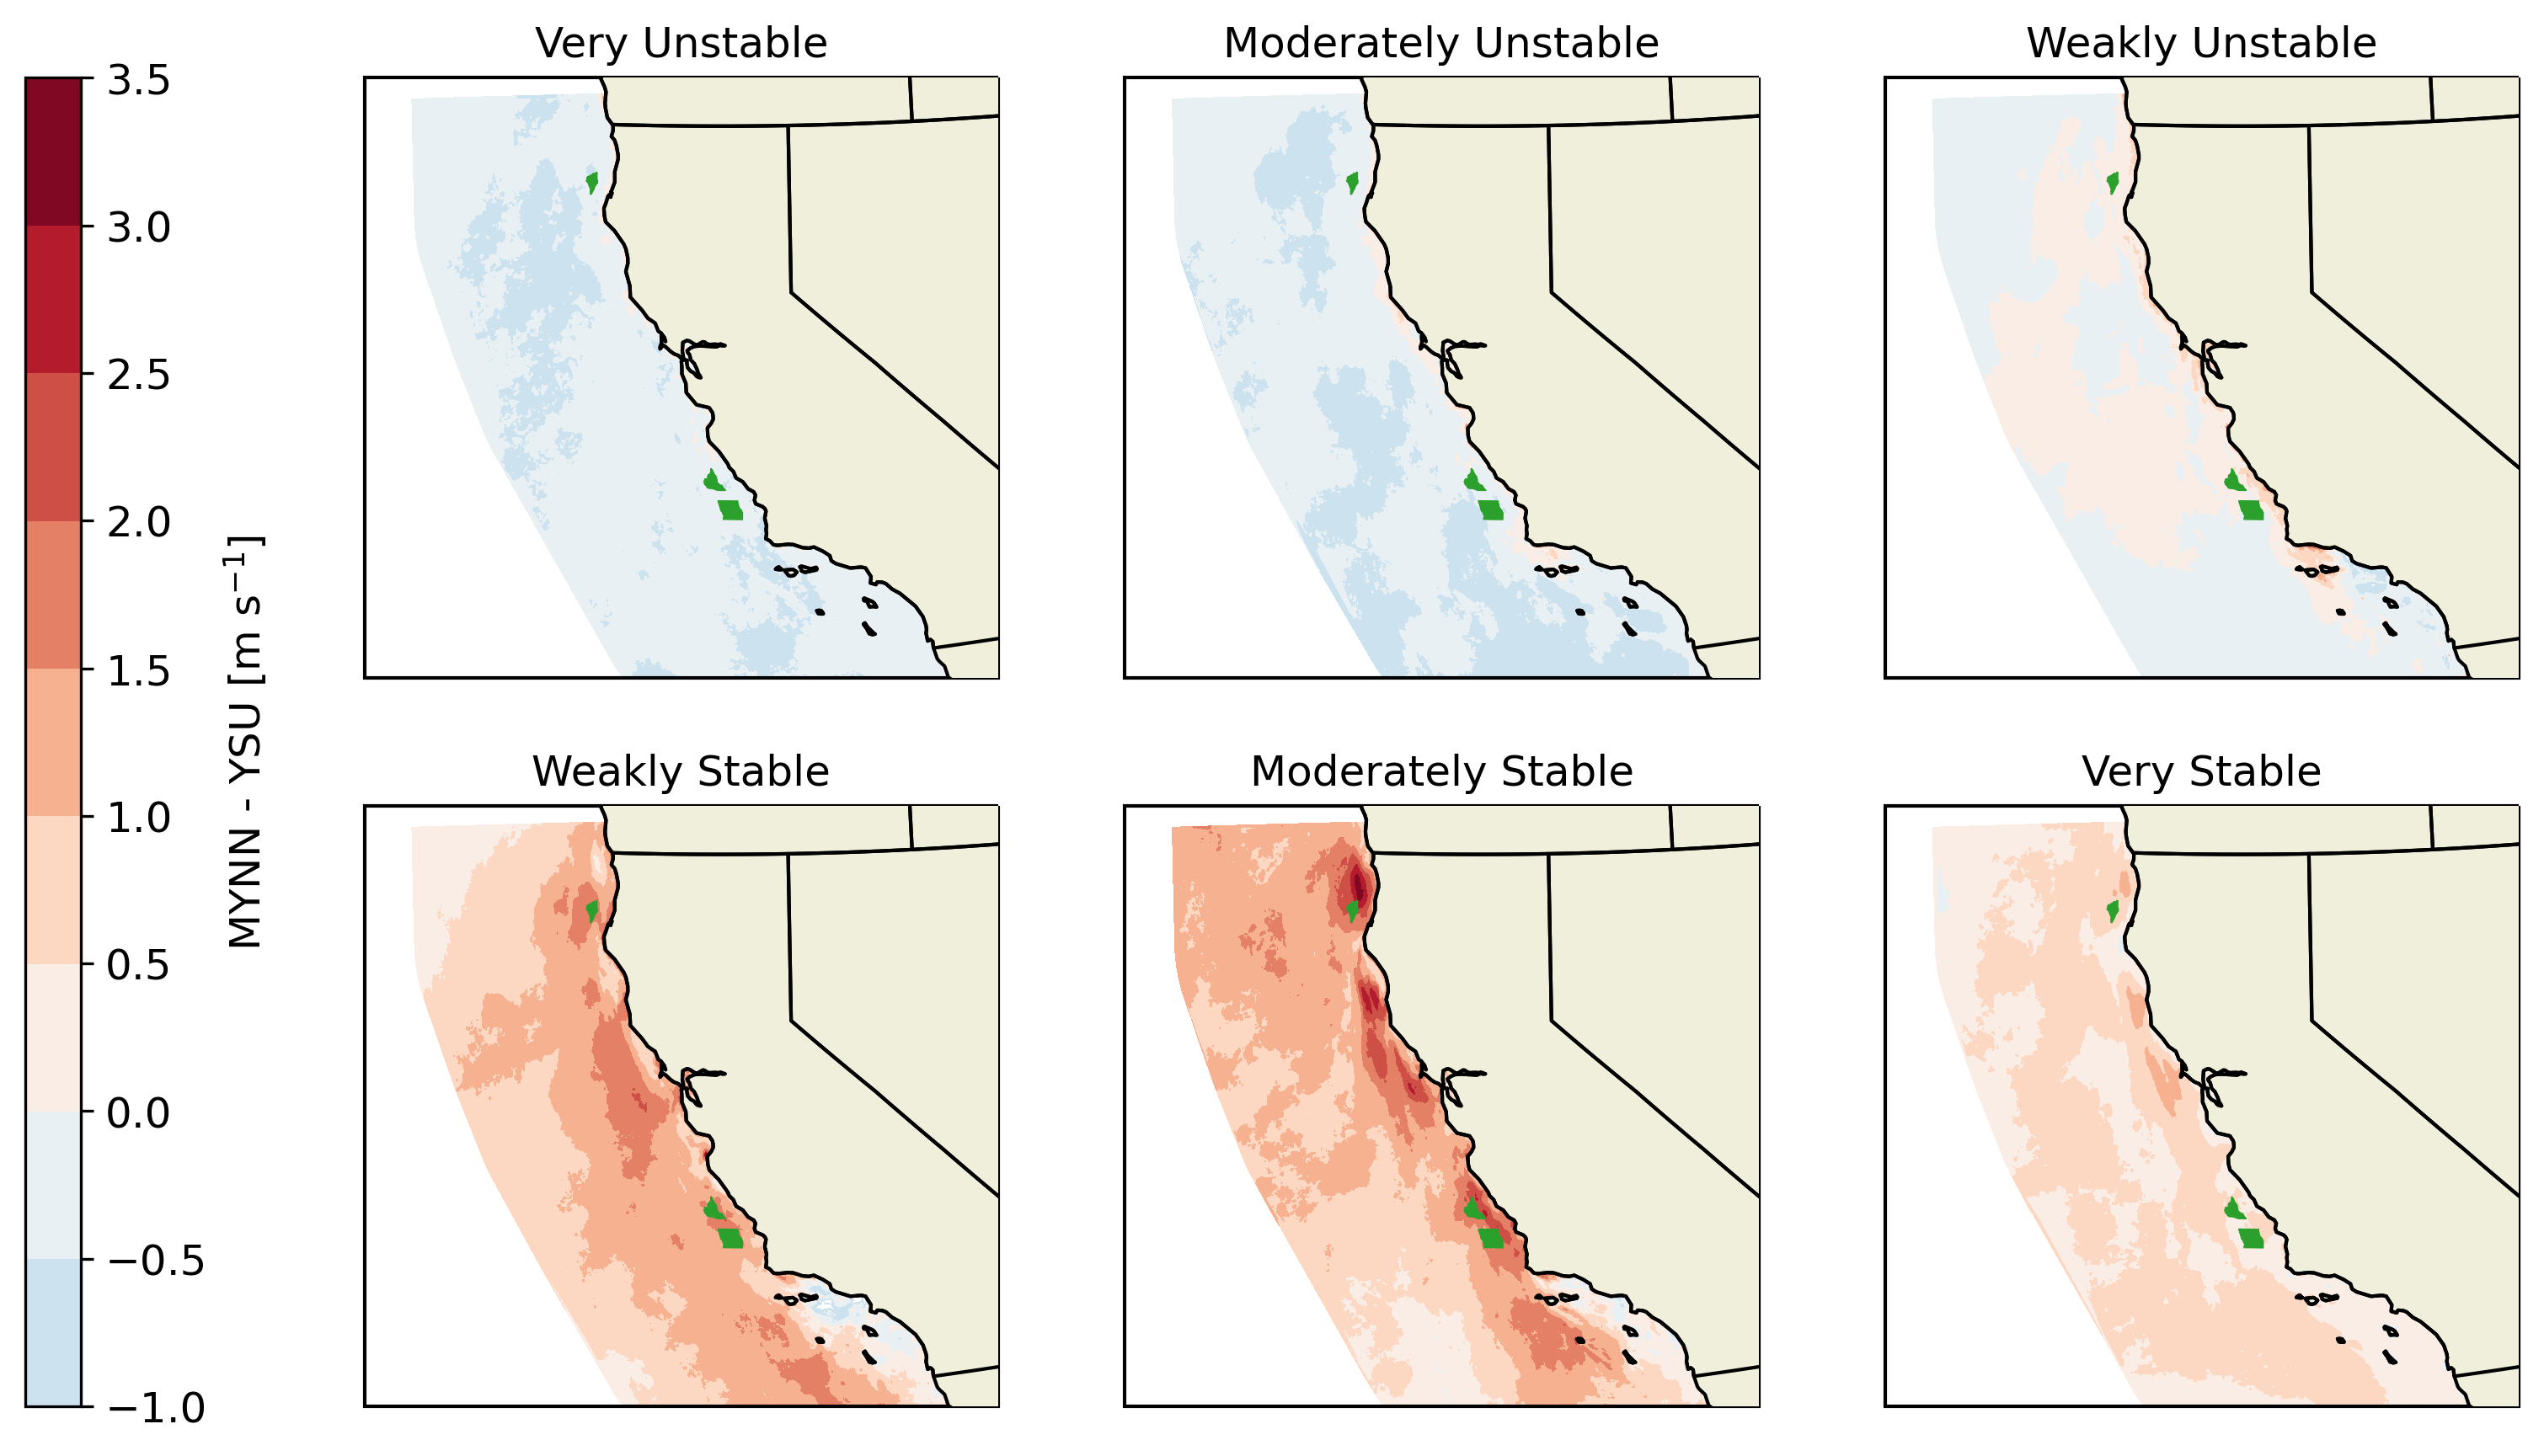

In [8]:
### Difference between CA20 and WTK
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(2, 3, figsize=(11, 7), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True, dpi=300)

ax[0,0].set_extent(MAP_BOUNDS)

# ticks_wind = np.linspace(1, 18, 18)
ticks_diff = np.linspace(-1, 3.5, 10)

# VUN
im3 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        mynn_vun_wind-ysu_vun_wind,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))

# UN
im3 = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        mynn_un_wind-ysu_un_wind,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))

# WUN
im3 = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        mynn_wun_wind-ysu_wun_wind,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))


# WS
im3 = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        mynn_ws_wind-ysu_ws_wind,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))

# S
im3 = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        mynn_s_wind-ysu_s_wind,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))

# VS
im3 = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        mynn_vs_wind-ysu_vs_wind,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))


cax1 = fig.add_axes([ax[-1,0].get_position().x1-0.35,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar1 = fig.colorbar(im3, cax=cax1, ticks=ticks_diff)
cbar1.set_label('MYNN - YSU [m s$^{-1}$]', fontsize=12)
cbar1.ax.tick_params(labelsize=12)
# cax2 = fig.add_axes([ax[-1,-1].get_position().x0+0.26,ax[-1,-1].get_position().y0,0.02,ax[0,-1].get_position().y1-ax[-1,-1].get_position().y0])
# cbar2 = fig.colorbar(im3, cax=cax2, ticks=ticks_diff)
# cbar2.set_label('MYNN - YSU [m/s]', fontsize=12)
# cbar2.ax.tick_params(labelsize=12)


ax[0,0].set_title("Very Unstable")
ax[0,1].set_title("Moderately Unstable")
ax[0,2].set_title("Weakly Unstable")
ax[1,0].set_title("Weakly Stable")
ax[1,1].set_title("Moderately Stable")
ax[1,2].set_title("Very Stable")

# Add land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# Add states
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

## Add lease areas
ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig("../figures/fig08.png", bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  from ipykernel import kernelapp as app
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed

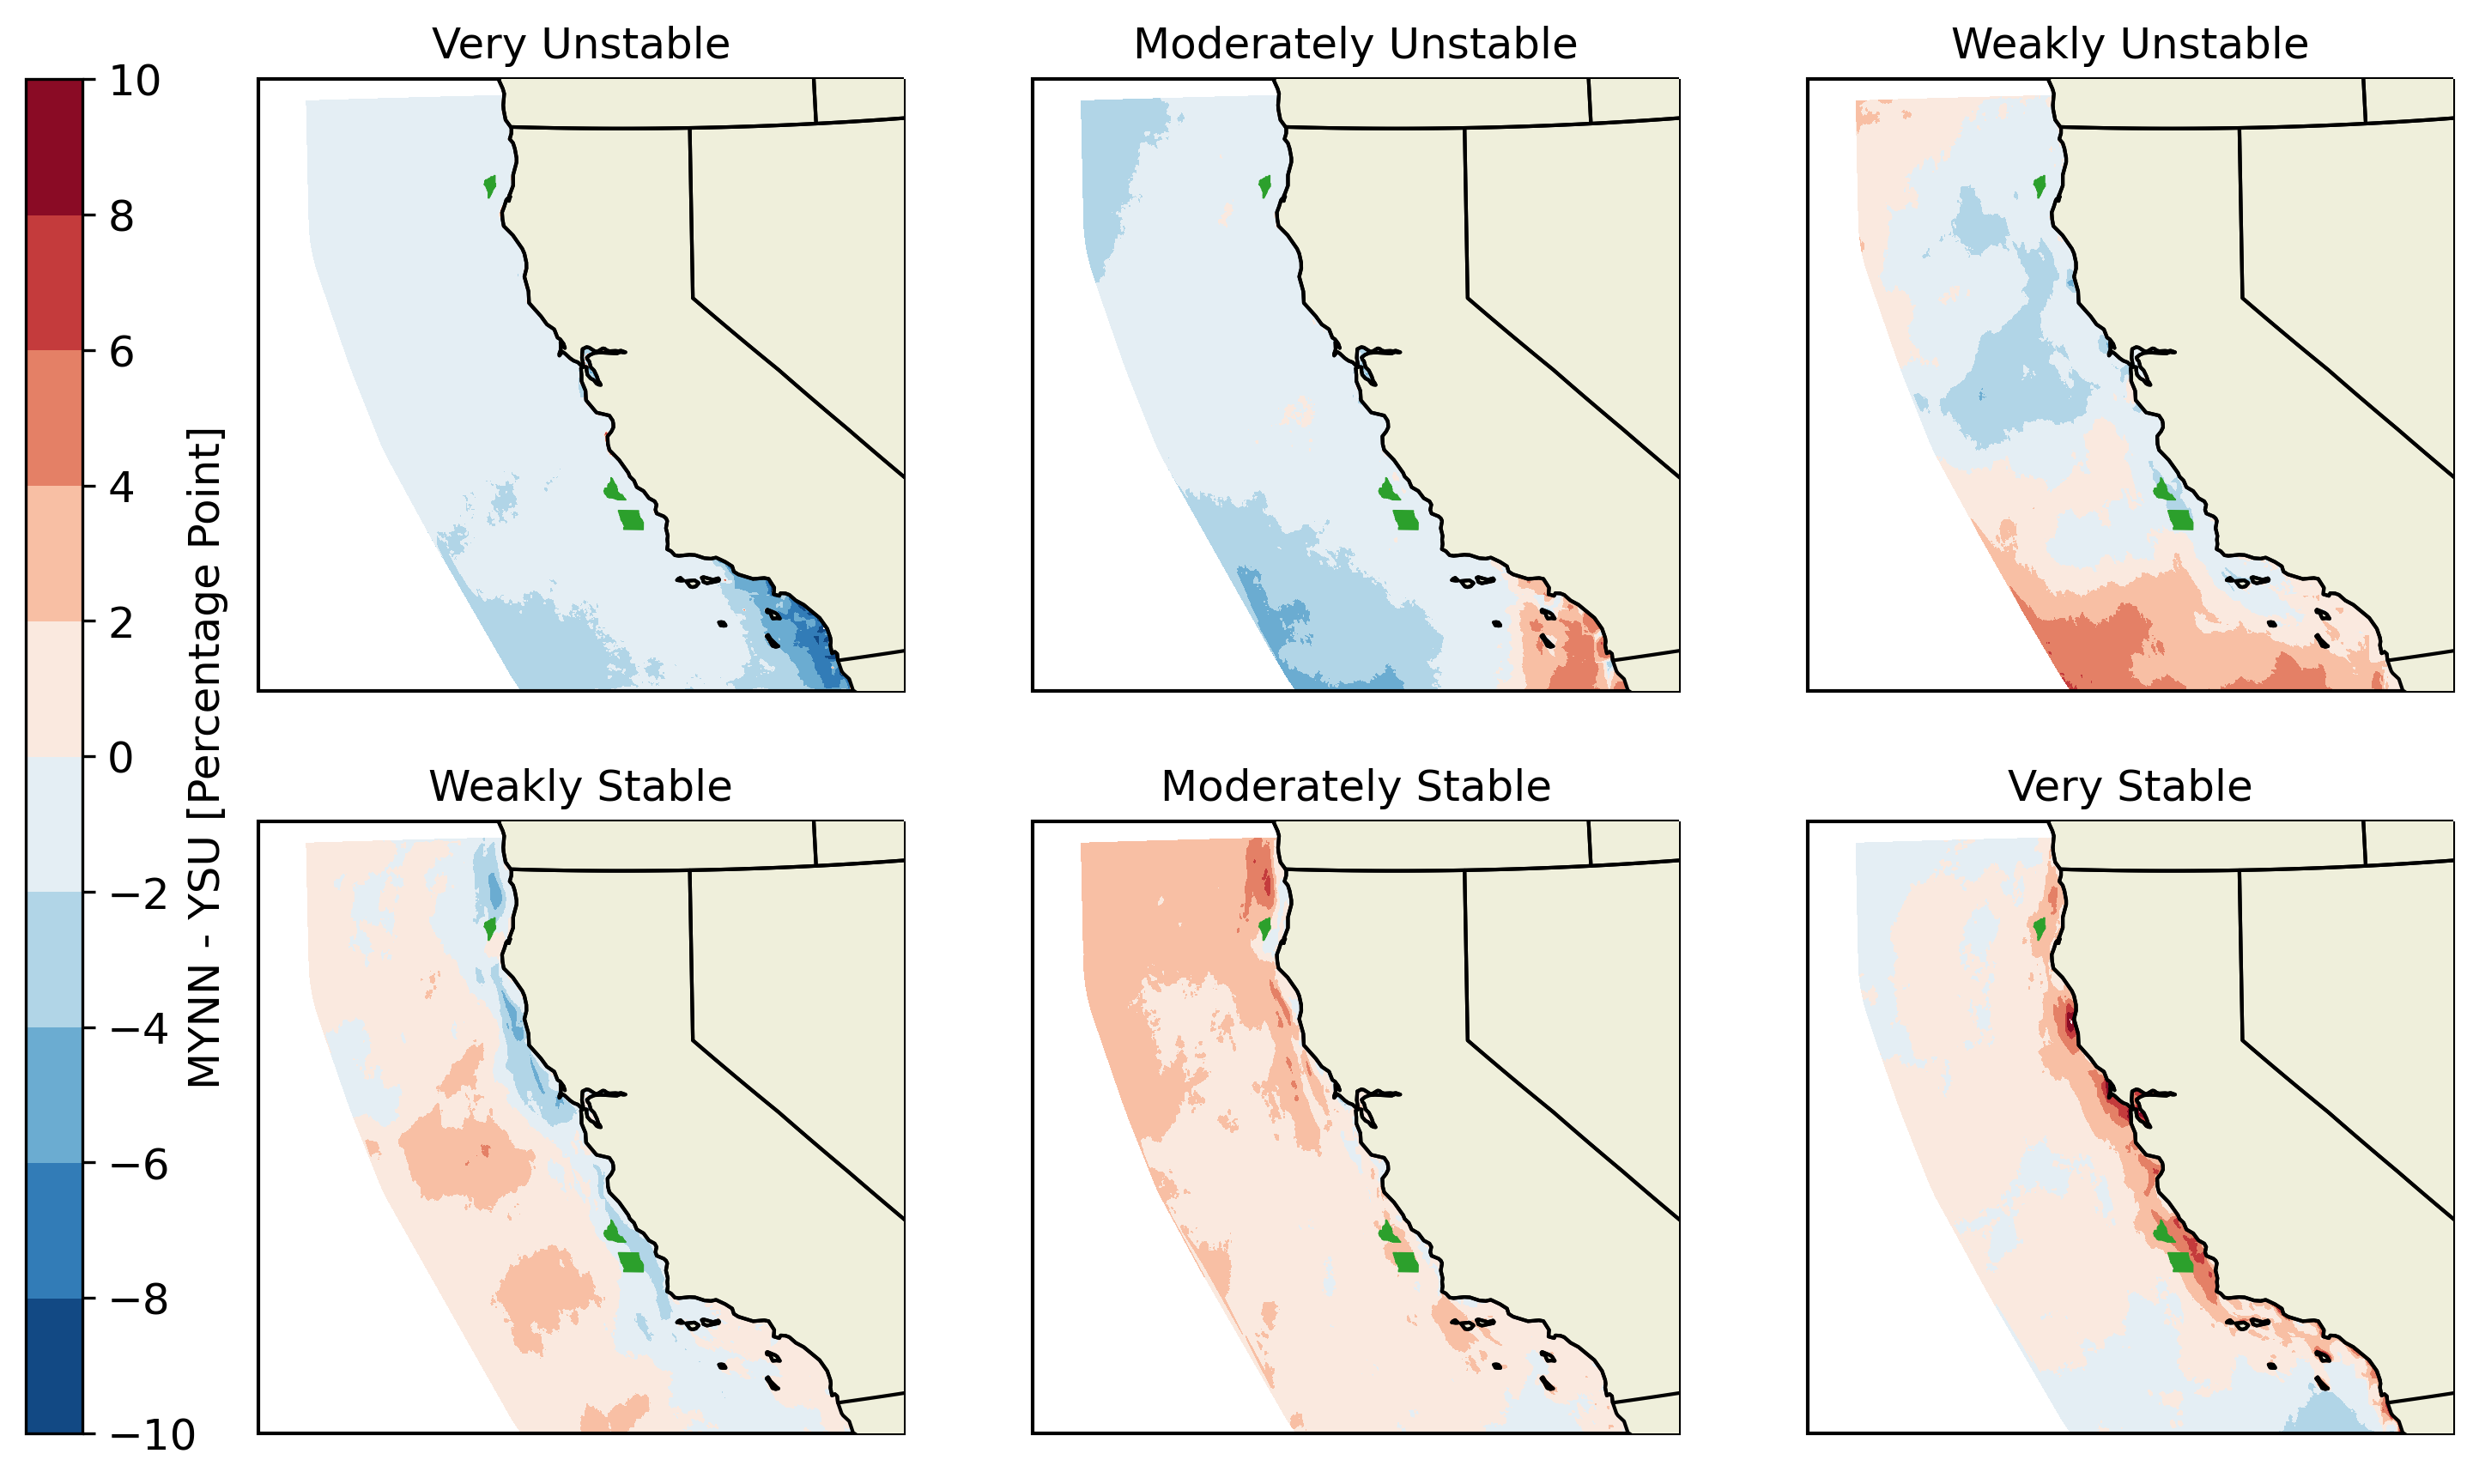

In [9]:
### Difference between CA20 and WTK
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(2, 3, figsize=(11, 7), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True, dpi=300)

ax[0,0].set_extent(MAP_BOUNDS)

# ticks_wind = np.linspace(1, 18, 18)
ticks_diff = np.linspace(-10, 10, 11)

im3 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        mynn_vun_pct-ysu_vun_pct,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im3 = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        mynn_un_pct-ysu_un_pct,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im3 = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        mynn_wun_pct-ysu_wun_pct,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im3 = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        mynn_ws_pct-ysu_ws_pct,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im3 = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        mynn_s_pct-ysu_s_pct,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im3 = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        mynn_vs_pct-ysu_vs_pct,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))



cax2 = fig.add_axes([ax[-1,0].get_position().x1-0.31,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar2 = fig.colorbar(im3, cax=cax2, ticks=ticks_diff)
cbar2.set_label('MYNN - YSU [Percentage Point]', fontsize=12, labelpad=-3)
cbar2.ax.tick_params(labelsize=12)


ax[0,0].set_title("Very Unstable")
ax[0,1].set_title("Moderately Unstable")
ax[0,2].set_title("Weakly Unstable")
ax[1,0].set_title("Weakly Stable")
ax[1,1].set_title("Moderately Stable")
ax[1,2].set_title("Very Stable")

# Add land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# Add states
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

## Add lease areas
ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig("../figures/ri_percentages_breakdown_offshore_diff.png", bbox_inches='tight')

plt.show()